In [5]:
from google.colab import files
uploaded = files.upload()


Saving retail_sales_dataset.csv to retail_sales_dataset (2).csv


In [8]:
import pandas as pd

df = pd.read_csv('retail_sales_dataset.csv')
df.head()  # shows first 5 rows


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [9]:
df.head()  # Shows first 5 rows
df.shape   # Shows number of rows and columns
df.columns # Shows column names
df.info()  # Data types and null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data
df = pd.read_csv('retail_sales_dataset.csv')

# Data Cleaning
df.info()  # Check data types
df.isnull().sum()  # Check missing values

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Optional: Remove duplicates
df = df.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [13]:
# Basic Stats
print("Mean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))
print("\nMode:\n", df.mode().iloc[0])
print("\nStandard Deviation:\n", df.std(numeric_only=True))

# Describe Summary
df.describe()


Mean:
 Transaction ID    500.500
Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64

Median:
 Transaction ID    500.5
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64

Mode:
 Transaction ID                        1
Date                2023-05-16 00:00:00
Customer ID                     CUST001
Gender                           Female
Age                                43.0
Product Category               Clothing
Quantity                            4.0
Price per Unit                     50.0
Total Amount                       50.0
Name: 0, dtype: object

Standard Deviation:
 Transaction ID    288.819436
Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


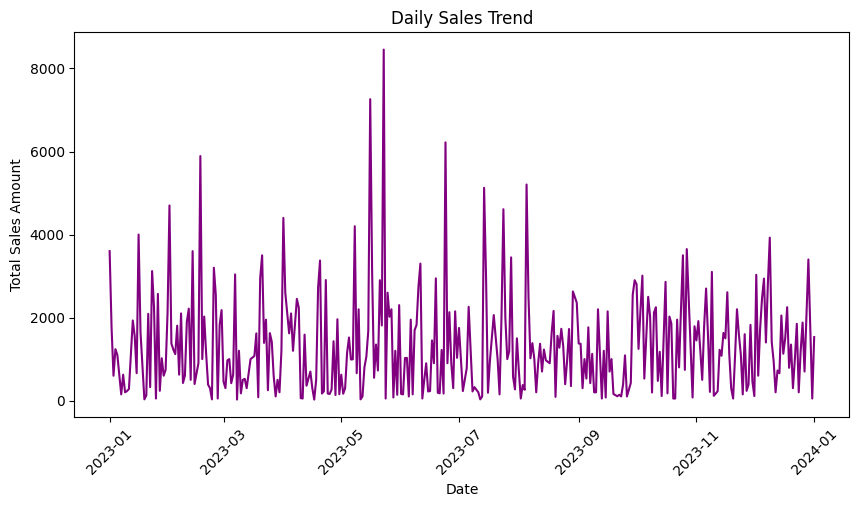

/tmp/ipython-input-14-1999203300.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='Blues')


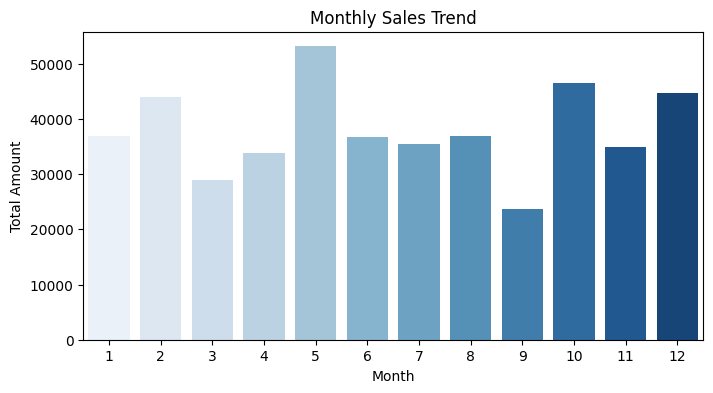

In [14]:
# Daily Sales Trend
daily_sales = df.groupby('Date')['Total Amount'].sum()

plt.figure(figsize=(10,5))
plt.plot(daily_sales.index, daily_sales.values, color='purple')
plt.title("Daily Sales Trend")
plt.ylabel("Total Sales Amount")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.show()

# Monthly Sales Trend
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Total Amount'].sum()

plt.figure(figsize=(8,4))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='Blues')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Amount")
plt.xlabel("Month")
plt.show()


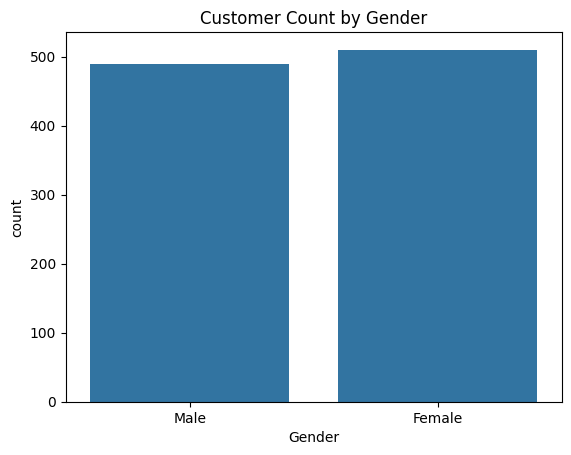

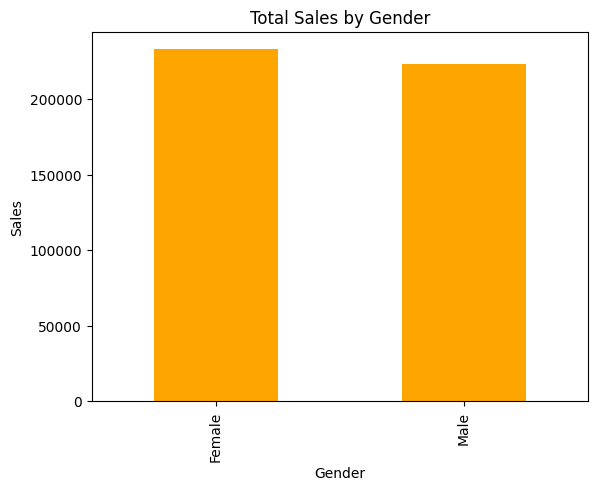

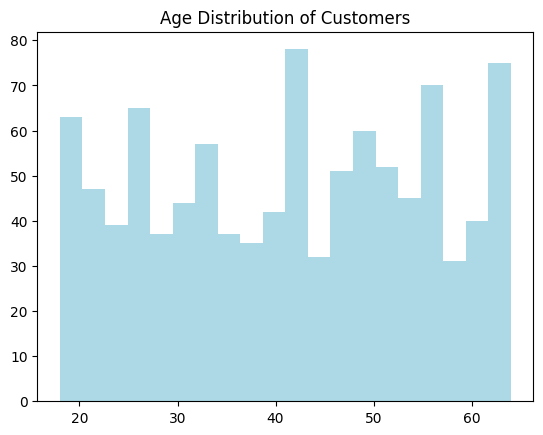

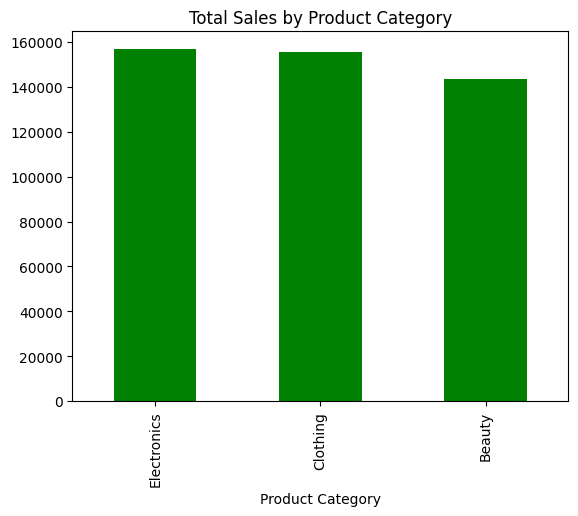

In [15]:
# Sales by Gender
sns.countplot(x='Gender', data=df)
plt.title("Customer Count by Gender")
plt.show()

gender_sales = df.groupby('Gender')['Total Amount'].sum()
gender_sales.plot(kind='bar', color='orange')
plt.title("Total Sales by Gender")
plt.ylabel("Sales")
plt.show()

# Age Distribution
plt.hist(df['Age'], bins=20, color='lightblue')
plt.title("Age Distribution of Customers")
plt.show()

# Product Sales
product_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
product_sales.plot(kind='bar', color='green')
plt.title("Total Sales by Product Category")
plt.show()


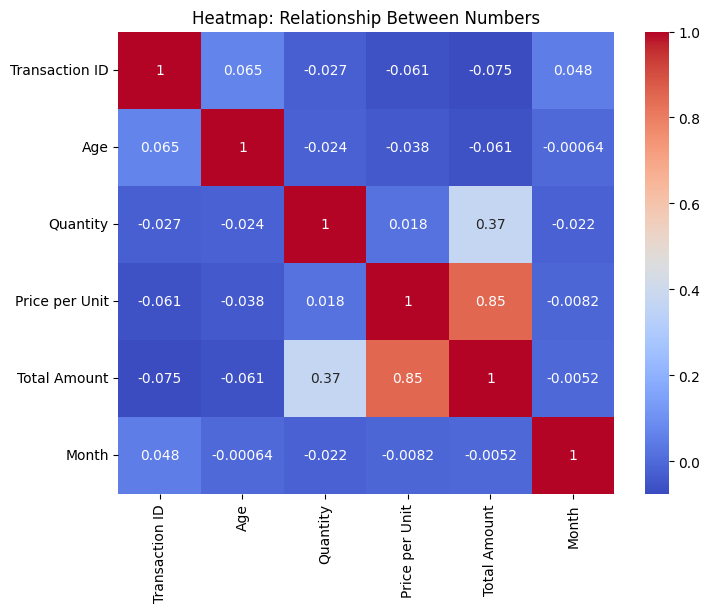

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Heatmap: Relationship Between Numbers")
plt.show()
